<h1>Semester Project for Decision Systems 2020/2021 (University of Warsaw)<h1>
    <h2>Joanna Kęczkowska<h2>

The goal of the competition is to create an efficient model for predicting whether the total 14-days sales of a particular product, offered by the Fitfood company at one of their FitBoxy locations in Poland, will exceed four pieces.

Provided data describe a short-term sales history of products at various point of sales (PoS). The target attribute will_it_sell tells if in the following 14 day period the total sales of a given product at a particular location will be at least 4 pcs. 

The data tables are provided as two CSV files with the ';' separator sign.

<h3>Data preparation<h3>

In [1]:
import pandas as pd

In [2]:
dataSet = pd.read_csv("FitFood_competition_data_training.csv", sep=';')
dataSet.shape

(531824, 97)

In [3]:
dataSet.describe()

will_it_sell  product_id_unified  partner_product  cooking_mv  \
count  531824.000000       531824.000000    531824.000000    231884.0   
mean        0.119477         1104.984531         0.091600         1.0   
std         0.324350           55.861218         0.288461         0.0   
min         0.000000         1004.000000         0.000000         1.0   
25%         0.000000         1057.000000         0.000000         1.0   
50%         0.000000         1117.000000         0.000000         1.0   
75%         0.000000         1152.000000         0.000000         1.0   
max         1.000000         1193.000000         1.000000         1.0   

       cooking_ov            vat    bialko_100     weglow_100     cukry_calk  \
count    231884.0  531824.000000  496291.00000  496290.000000  496202.000000   
mean          1.0       6.628563       7.47106      19.206512       8.332242   
std           0.0       4.417655       6.73606      15.012734       7.248779   
min           1.0       5.000000       0.00000       2.700000       0.200000   
25%           1.0       5.000000       3.20000       9.200000       3.000000   
50%           1.0       5.000000       6.80000      13.000000       5.900000   
75%           1.0       5.000000       8.90000      23.400000      12.600000   
max           1.0      23.000000      38.00000      61.300000      29.500000   

       tluszcz_nasyc_calk  ...  avg_total_to_discount_lag1  \
count       496202.000000  ...                5.288900e+05   
mean             3.861230  ...                7.927875e-01   
std              3.268845  ...                3.095363e+00   
min              0.000000  ...               -1.421085e-13   
25%              1.500000  ...                0.000000e+00   
50%              3.000000  ...                0.000000e+00   
75%              5.100000  ...                0.000000e+00   
max             14.300000  ...                6.965000e+01   

       avg_total_base_lag1  avg_sum_fv_lag1  \
count        528890.000000         528890.0   
mean              3.106582              0.0   
std               6.165410              0.0   
min               0.000000              0.0   
25%               0.000000              0.0   
50%               0.000000              0.0   
75%               0.000000              0.0   
max             187.840000              0.0   

       avg_transaction_discount_count_lag1      roc1_lag1  rocPeriod_lag1  \
count                        528890.000000  528890.000000   528890.000000   
mean                              0.098661      -0.001819       -0.008464   
std                               0.292494       0.237530        0.622241   
min                               0.000000      -2.772589       -3.465736   
25%                               0.000000       0.000000        0.000000   
50%                               0.000000       0.000000        0.000000   
75%                               0.000000       0.000000        0.000000   
max                               3.000000       2.772589        3.465736   

       days_since_prev_delivery  sales_since_prev_delivery  \
count             474094.000000              474094.000000   
mean                  16.806237                   0.351909   
std                   30.601578                   1.024078   
min                    1.000000                   0.000000   
25%                    2.000000                   0.000000   
50%                    5.000000                   0.000000   
75%                    9.000000                   0.000000   
max                  256.000000                  31.000000   

       available_products  is_delivery_day  
count       476634.000000    531823.000000  
mean             1.197972         0.118019  
std              3.569655         0.322630  
min            -24.000000         0.000000  
25%              0.000000         0.000000  
50%              0.000000         0.000000  
75%              2.000000         0.000000  
max            601.000000        

In [4]:
dataSet.head()

will_it_sell                    pos_id  product_id_unified  \
0             1  5cd2c7b75314a576b410fb6f                1146   
1             0  5b291c490663ab48e334abce                1136   
2             0  5b1bb68ecaef965005d0e938                1051   
3             0  5cdbd1ba9083f77a4476ff58                1069   
4             0  5c1232411462a123065f3b58                1135   

                 company_id               category_id          category_name  \
0  5cc01f99def57b4350f57e6f  59005cd6c5c79d3575eb450d              Przekąski   
1  5b9fa5e201f82e03b412bcff  5a0033206cdc0d08a6591bfb       Dania Lunch Małe   
2  5b1f8a17caef965005d12d7e  5abe0aed049e180557e22330                Sałatki   
3  5d14ae03ad08444d3ee1eecd  5cd1a4d32b10792bc08dab31  Pan Pomidor - Pierogi   
4  5beada3478729f2c8afeeb90  5a0033206cdc0d08a6591bfb       Dania Lunch Małe   

                                        product_name  partner_product  \
0                    Superfood SPORT - banan, białko                1   
1                        Szaszłyk z ryżem w kurkumie                0   
2  FitSalad - Sałatka z kurczakiem i grillowanymi...                0   
3                                     Pierogi ruskie                0   
4           Pikantny ryż jaśminowy smażony z jajkiem                0   

  address_city            diet  ... avg_total_to_discount_lag1  \
0      Wrocław             NaN  ...                        NaN   
1       Kraków  Dieta Samuraja  ...                      13.99   
2     Warszawa              --  ...                       0.00   
3      Wrocław             NaN  ...                       0.00   
4     Katowice  Dieta Samuraja  ...                       0.00   

  avg_total_base_lag1  avg_sum_fv_lag1  avg_transaction_discount_count_lag1  \
0                 NaN              NaN                                  NaN   
1               13.99              0.0                                  1.0   
2                0.00              0.0                                  0.0   
3                0.00              0.0                                  0.0   
4                0.00              0.0                                  0.0   

  roc1_lag1  rocPeriod_lag1  days_since_prev_delivery  \
0       NaN             NaN                       NaN   
1       0.0        1.609438                       NaN   
2       0.0        0.000000                      71.0   
3       0.0        0.000000                       2.0   
4       0.0        0.000000                       NaN   

   sales_since_prev_delivery  available_products  is_delivery_day  
0                        NaN                16.0              1.0  
1                        NaN                 NaN              0.0  
2                        0.0                 0.0              0.0  
3                        0.0                 0.0              0.0  
4                        NaN                 NaN              0.0  

[5 rows x 97 columns]

In [5]:
import numpy as np

#Getting categorical data
df_cat = dataSet.loc[:,dataSet.dtypes==np.object]
#Getting Numeric data
df_num = dataSet.loc[:,dataSet.dtypes!=np.object]

dataSet.info()

y = dataSet.pop('will_it_sell')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531824 entries, 0 to 531823
Data columns (total 97 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   will_it_sell                         531824 non-null  int64  
 1   pos_id                               531824 non-null  object 
 2   product_id_unified                   531824 non-null  int64  
 3   company_id                           531824 non-null  object 
 4   category_id                          531824 non-null  object 
 5   category_name                        531824 non-null  object 
 6   product_name                         531824 non-null  object 
 7   partner_product                      531824 non-null  int64  
 8   address_city                         531824 non-null  object 
 9   diet                                 282103 non-null  object 
 10  size                                 531824 non-null  object 
 11  cooking_time 

In [6]:
y.value_counts()

0    468283
1     63541
Name: will_it_sell, dtype: int64

**Note:** Features must be numeric with meaningful magnitude. We will cover this later.\
Now we need to split -dataSet- to training set and testing set.  If we want to (approximately) keep the proportion of y values through the training and test sets, then we need to pass stratify=y. This will enable stratified splitting:

In [7]:
from sklearn.model_selection import train_test_split

#X_train - dataset for training and tuning hyperparameters, X_test - dataset for evaluating our model
X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.2, random_state=42, stratify=y) 
#data was split in a stratified fashion

In [8]:
objlist = X_train.select_dtypes(include="object").columns
for cols in objlist:
    print('___________')
    print(X_train[cols].value_counts())

___________
596e2a5371059a6bc70a818b    2053
5b1b963bcaef965005d0e6b0    2027
5b61699404852c4704a26f28    2016
59fc5325c94b722506678bd1    2011
5b1bad72caef965005d0e891    2007
                            ... 
5dc694443bf8f15dc97ec3c7       5
5dc69e723bf8f15dc97ec4de       5
5dcd4c06dacdf109c179d79b       3
5dcbccb4aa5f032f78d77579       2
5dcd2fb58fc7d108e6b8bc09       1
Name: pos_id, Length: 375, dtype: int64
___________
5a587706cf5c8134b3a9891d    7952
5c48270855f3af637b69b13f    7559
5b9fa5e201f82e03b412bcff    6331
5b503c4a9586df16bbb6e07a    6135
5c924f69b6cb840dcac430fe    5983
                            ... 
5dbff5229f38f239c2ffeb55      20
5dc534a2fdcd0622bd7b34e5      18
5e4550dd177446520bcd2c91      11
5d764e2fd0c59c62f781ff36       5
5d764e24bf7a586310594da4       4
Name: company_id, Length: 298, dtype: int64
___________
5a6f110ca0899f5ca2f7d6e9    90519
59005cd6c5c79d3575eb450d    73645
5a0033206cdc0d08a6591bfb    63665
591301c83dd75608a9c2ef1b    39234
590053bdc5c79d3575

File "encoding" contains pipelines with list of transforms for categorial variables and numeric variables.   
##### For categorial variables:  
**Simple imputer** fills missing cells with 'missing'.  
**HashEncoder** is suitable for categorial variables with large numer of levels.  
**OneHotEncoder** refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.   Collinear features cause problems, such as when feeding the resulting data into a neural network or an unregularized regression. Therefore parameter drop='first'.

##### For numeric variables:  
**Simple imputer** fills missing cells with mode for each column.  

In [9]:
from encoding import encode

#colmun of the same value in each row is useless
del X_train["cooking_time"]
del X_test["cooking_time"]

X_train, X_test=encode(X_train, X_test)

<AxesSubplot:>

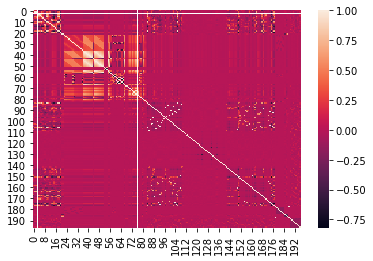

In [10]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [11]:
X_train.to_csv("X_train.csv", sep=';', encoding='utf-8')
y_train.to_csv("y_train.csv", sep=';', encoding='utf-8')
X_test.to_csv("X_test.csv", sep=';', encoding='utf-8')
y_test.to_csv("y_test.csv", sep=';', encoding='utf-8')

**LightGBM** is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage. It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks

**Architecture**  
LightGBM splits the tree leaf-wise as opposed to other boosting algorithms that grow tree level-wise. It chooses the leaf with maximum delta loss to grow. Since the leaf is fixed, the leaf-wise algorithm has lower loss compared to the level-wise algorithm. Leaf-wise tree growth might increase the complexity of the model and may lead to overfitting in small datasets.

In [12]:
#import eli5
#from eli5.sklearn import PermutationImportance
import lightgbm as lgbm

In [13]:
model = lgbm.LGBMClassifier(device="gpu")
model.fit(X_train, y_train)
preds = model.predict(X_test)
filename = 'finalized_model.sav'
model.booster_.save_model(filename)


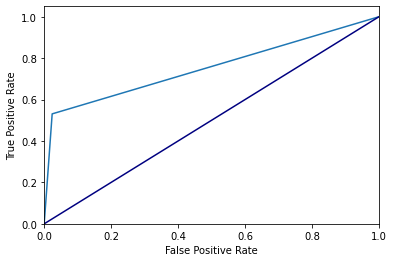

In [14]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
metrics.auc(fpr, tpr)


roc_auc = dict()
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


#not great not terrible

In [15]:
metrics.confusion_matrix(y_test, preds)

array([[91427,  2230],
       [ 5962,  6746]], dtype=int64)

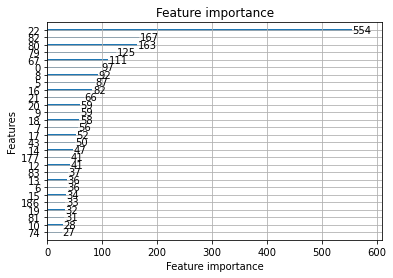

In [16]:
ax = lgbm.plot_importance(model, max_num_features=28)
ax.figure.savefig('feature_importance_lgbm.png')

In [17]:
#remove highly correlated features

**Parameter Tuning**  
Few important parameters and their usage is listed below :  

**max_depth** : It sets a limit on the depth of tree. The default value is 20. It is effective in controlling over fitting.  
**categorical_feature** : It specifies the categorical feature used for training model.   
**bagging_fraction** : It specifies the fraction of data to be considered for each iteration.  
**num_iterations** : It specifies the number of iterations to be performed. The default value is 100.  
**num_leaves** : It specifies the number of leaves in a tree. It should be smaller than the square of max_depth.  
**max_bin** : It specifies the maximum number of bins to bucket the feature values.  
**min_data_in_bin** : It specifies minimum amount of data in one bin.  
**task** : It specifies the task we wish to perform which is either train or prediction. The default entry is train. Another possible value for this parameter is prediction.  
**feature_fraction** : It specifies the fraction of features to be considered in each iteration. The default value is one.  


In [18]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [26]:
FIXED_PARAMS={'objective': 'binary',
              "eval_set" : [(X_validate,y_validate)],
              'metric': ["auc","error", "log-loss"],
              'is_unbalance':True,
              'num_boost_round':300}

In [27]:
model = lgbm.LGBMClassifier(**FIXED_PARAMS, device="gpu")
model.fit(X_train, y_train)
preds = model.predict(X_validate)

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


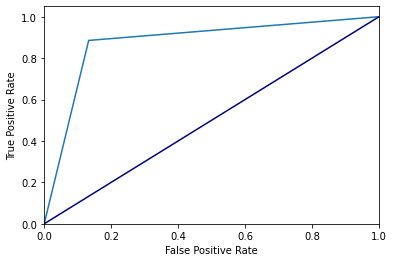

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_validate, preds)
metrics.auc(fpr, tpr)


roc_auc = dict()
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [30]:
metrics.confusion_matrix(y_validate, preds)

array([[64971,  9954],
       [ 1164,  9003]], dtype=int64)

In [ ]:
metrics.auc(fpr, tpr)

In [39]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_HP_points_to_test = 100 #This parameter defines the number of HP points to be tested
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

gs = RandomizedSearchCV(
    estimator=model, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='neg_log_loss',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [40]:
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] Unknown parameter: 26723
[LightGBM] [Warning] Unknown parameter: 187
[LightGBM] [Warning] Unknown parameter: 5.0
[LightGBM] [Warning] Unknown parameter: 1160.0
[LightGBM] [Warning] Unknown parameter: 92763
[LightGBM] [Warning] Unknown parameter: 1051.0
[LightGBM] [Warning] Unknown parameter: 342.5
[LightGBM] [Warning] Unknown parameter: 385.0
[LightGBM] [Warning] Unknown parameter: 1191.0
[LightGBM] [Warning] Unknown parameter: 495.0
[LightGBM] [Warning] Unknown parameter: 104979
[LightGBM] [Warning] Unknown parameter: 106912
[LightGBM] [Warning] Unknown parameter: eval_set
[LightGBM] [Warning] Unknown parameter: 1155.0
[LightGBM] [Warning] Unknown parameter: 0
[LightGBM] [Warning] Unknown parameter: 1
[LightGBM] [Warning] Unknown parameter: 12.8
[LightGBM] [Warning] Unknown parameter: 3.0
[LightGBM] [Warning] Unknown parameter: 2
[LightGBM] [Warning] Unknown parameter: 3
[LightGBM] [Warning] Unk

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 2.0 is set=, 2.0= will be ignored. Current value: 2.0=
[LightGBM] [Warning] 268513 is set=, 268513= will be ignored. Current value: 268513=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[Li

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 37026 is set=, 37026= will be ignored. Current value: 37026=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[Light

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 46.6min finished
C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

Best score reached: -0.2815634898351837 with params: {'colsample_bytree': 0.9348023686516402, 'min_child_samples': 351, 'min_child_weight': 10.0, 'num_leaves': 47, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.49447771753795894} 


In [44]:
gs_sample_weight = GridSearchCV(estimator=model, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

gs_sample_weight.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 1.0 is set=, 1.0= will be ignored. Current value: 1.0=
[LightGBM] [Warning] 5.0 is set=, 5.0= will be ignored. Current value: 5.0=
[LightGBM] [

C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 683, in fit
    self._Booster = train(params, train_set,
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\basic.py", line 2234, in __init__
    _safe_call(_LIB.

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 683, in fit
    self._Booster = train(params, train_set,
  File "C:\Users\Asia\anacond

C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 890, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 683, in fit
    self._Booster = train(params, train_set,
  File "C:\Users\Asia\anacond

Best score reached: 0.9465082680503019 with params: {'scale_pos_weight': 1} 


In [66]:
final_lgbm_model = lgbm.LGBMClassifier(**FIXED_PARAMS, device="gpu")
params = {'scale_pos_weight': 1, 'colsample_bytree': 0.9348023686516402, 'min_child_samples': 351, 'min_child_weight': 10.0, 'num_leaves': 47, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.49447771753795894}
final_lgbm_model.set_params(**params)
data =  pd.read_csv("X_train.csv", sep=';')
data = data.iloc[:, 1:]
label = pd.read_csv("y_train.csv", sep=';')
y = pd.DataFrame(label["will_it_sell"])

final_lgbm_model.fit(data, y)

C:\Users\Asia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asia\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(colsample_bytree=0.9348023686516402, device='gpu',
               eval_set=[(           0    1    2    3    4     5     6    7     8      9    ...  187  \
104979  1155.0  0.0  1.0  1.0  5.0   1.2  12.8  4.0   5.1  495.0  ...  0.0   
26723   1160.0  0.0  1.0  1.0  5.0   9.7   9.1  0.3   6.0  620.0  ...  0.0   
106912  1158.0  0.0  1.0  1.0  5.0   1.2  12.8  4.0   5.1  495.0  ...  0.0   
92763   1192.0  0.0  1.0  1.0  5.0  11.5   9.2  1.0   2.5  409.5  ...  0.0   
120377  1015.0  0.0  1.0  1.0  5.0   2.5   7.6  3.0   2.8  220.5  ...  1.0   
...        ...  ...  ...  ...  ...   ...   ....
[85092 rows x 197 columns],
                          52389     0
313491    1
134148    0
263094    1
172142    0
         ..
58682     0
426897    0
182587    0
324161    0
512762    0
Name: will_it_sell, Length: 85092, dtype: int64)],
               is_unbalance=True, metric=['auc', 'error', 'log-loss'],
               min_child_samples=351, min_child_weight=10.0,
               num_boos

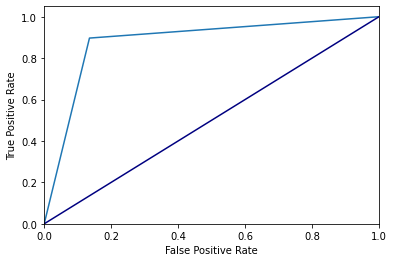

In [67]:
preds = final_lgbm_model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
metrics.auc(fpr, tpr)


roc_auc = dict()
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [68]:
metrics.confusion_matrix(y_test, preds)

array([[80995, 12662],
       [ 1311, 11397]], dtype=int64)

In [69]:
metrics.auc(fpr, tpr)


0.8808205955605412

**Bibliography**:
> https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/  
> https://neptune.ai/blog/lightgbm-parameters-guide  
> https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html